Week 5 - Lab 01
Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [30]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [35]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [37]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:
Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

Visualizations:
Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [70]:
freq_table = df['category'].value_counts().sort_values(ascending=False)
freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [79]:
freq_cat5 = freq_table.head(5)
freq_cat5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

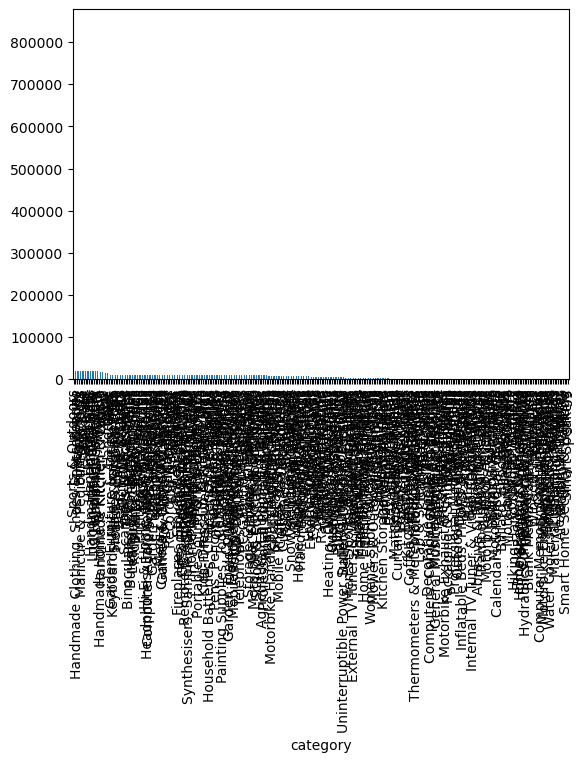

In [101]:
freq_table.plot.bar()

<Axes: xlabel='category'>

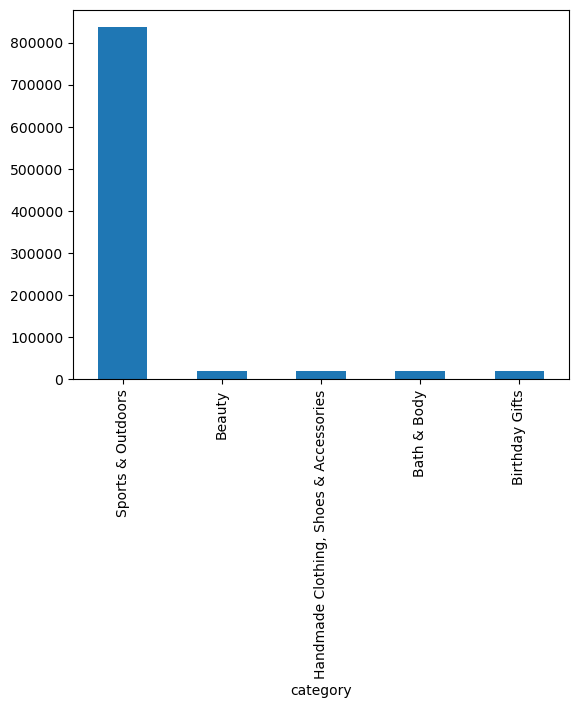

In [94]:
freq_cat5.plot.bar()

In [98]:
proportion_cat = df['category'].value_counts(normalize=True)
proportion_cat

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [105]:
prop_cat5 = proportion_cat.head(5)
prop_cat5

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

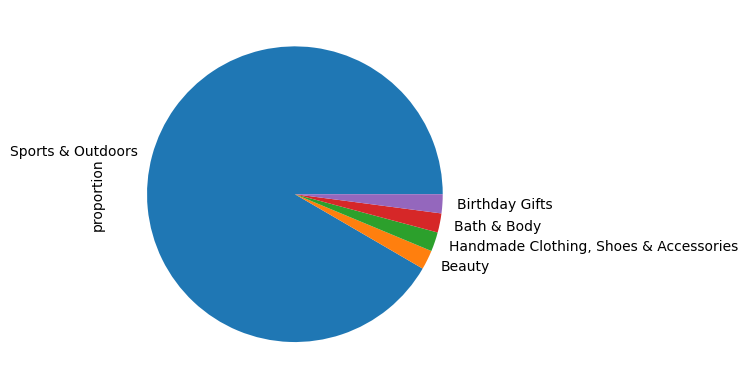

In [108]:
prop_cat5.plot.pie()

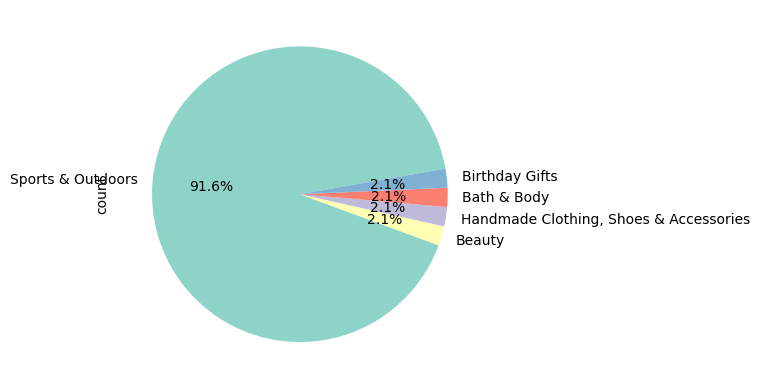

In [123]:
df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=10, colors=sns.color_palette("Set3"));

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [148]:
price_mean = df['price'].mean()
price_mean

89.24380943923663

In [150]:
price_median = df['price'].median()
price_median

19.09

In [152]:
price_mode = df['price'].mode()[0]
price_mode

9.99

The mean price of products is 89.24, and the median is 19.09. This means that the distribution is positively skewed, and there are a lot pf products with a price lower than the average. This is congruent with the mode, which is even lower than the median.

In [157]:
price_var = df['price'].var()
price_var

119445.48532256528

In [159]:
price_std = df['price'].std()
price_std

345.60886175352226

In [199]:
price_range = df['price'].quantile([0.25, 0.5, 0.75])
price_range

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

The calculation of the variance and standard diviation show a high degree of variability in the prices of the products. The calculation of the range confirms that there is a big difference between the lowest and highest prices.

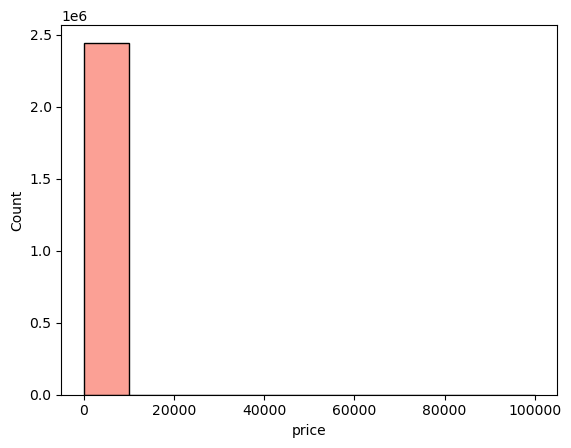

In [179]:
sns.histplot(df['price'], bins=10, color="salmon");

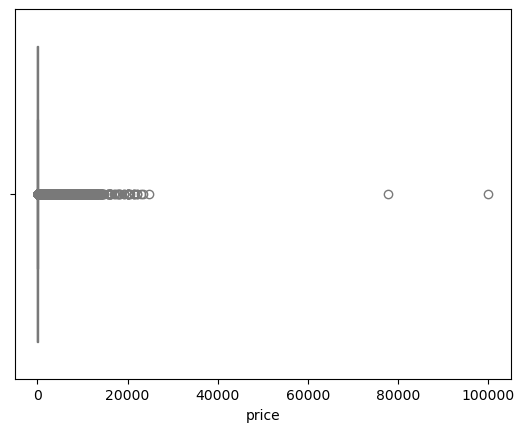

In [184]:
sns.boxplot(x = df['price'], color="lightblue");

From the bar plot and the box plot, we can see that the data has several outlier values. There are products with a very high price, but most of the products have a low price.

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [186]:
rate_mean = df['stars'].mean()
rate_mean

2.152836472966065

In [188]:
rate_median = df['stars'].median()
rate_median

0.0

In [190]:
rate_mode = df['stars'].mode()[0]
rate_mode

0.0

The fact that the median and the mode are 0, suggests that most customers do not rate the products.

In [192]:
rate_var = df['stars'].var()
rate_var

4.81743402976196

In [194]:
rate_std = df['stars'].std()
rate_std

2.1948653785054697

In [197]:
rate_range = df['stars'].quantile([0.25, 0.5, 0.75])
rate_range

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

The results for the 25% and 50% quartiles shows that indeed there are a lot of products with a review of 0.

In [202]:
skewness_rate = df['stars'].skew()
kurtosis_rate = df['stars'].kurtosis()

skewness_rate, kurtosis_rate

(0.08120735761080985, -1.9260061280432985)

The skewness calculation shows a minor positive skew in the reported rates. The kurtosis calculation shows very clear tails compared to a normal distribution.

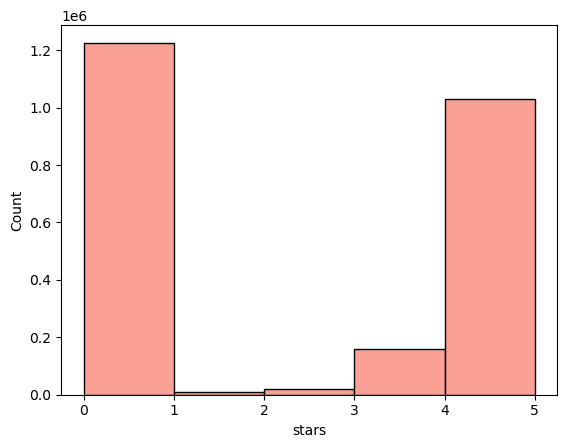

In [207]:
sns.histplot(df['stars'], bins=5, color="salmon");

From the calculated plot we can see that there are indeed a very high number of products that have nt been reviewed.